In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# We keep the Lens at the centre of the FOV, and the source moves with some angular velocity behing the lens
# Source has a angular radius
# Lens is a point object

class Simul:
    
    def __init__(self, N, R_s, sx):
        self.N = N
        self.theta_E = 1
        self.R_s = R_s
        self.sx = sx
        self.sy = 0
        self.e_ring = np.zeros((50,2))
        phi = np.linspace(0, 2*np.pi, 50)
        self.e_ring[:,0] = self.theta_E*np.cos(phi)
        self.e_ring[:,1] = self.theta_E*np.sin(phi)

    def star_and_image(self):
        self.star = np.zeros((self.N,2))
        phi = np.linspace(0, 2*np.pi, self.N)
        self.star[:,0] = self.R_s*np.cos(phi) + self.sx
        self.star[:,1] = self.R_s*np.sin(phi) + self.sy
        self.image = []
        for i in range(self.N):
            x, y = self.star[i]
            th = math.sqrt(x**2 + y**2)
            t1 = (th + math.sqrt(th**2 + 4*self.theta_E**2))/2
            t2 = (th - math.sqrt(th**2 + 4*self.theta_E**2))/2
            phi = math.atan2(y, x)
            self.image.append([t1*math.cos(phi), t1*math.sin(phi)])
            self.image.append([t2*math.cos(phi), t2*math.sin(phi)])

    def plot(self):
        self.star_and_image()
        plt.scatter(0,0,s=5,c='black', label='Lens')
        plt.scatter(self.e_ring[:,0], self.e_ring[:,1], c='black', s=1 ,label='Einstein Ring')
        plt.scatter(self.star[:,0], self.star[:,1], c='r', s=1, label='Star')
        plt.scatter(np.array(self.image)[:,0], np.array(self.image)[:,1], c='b', s=1, label='Image')
        plt.scatter([-4,4],[-1,1],s=0)
        plt.legend()
        plt.axis('equal')
        # plt.show()

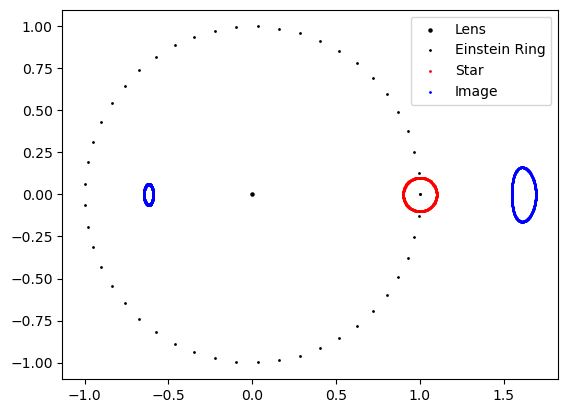

In [3]:
ob = Simul(250, 0.1, 1)
ob.plot()

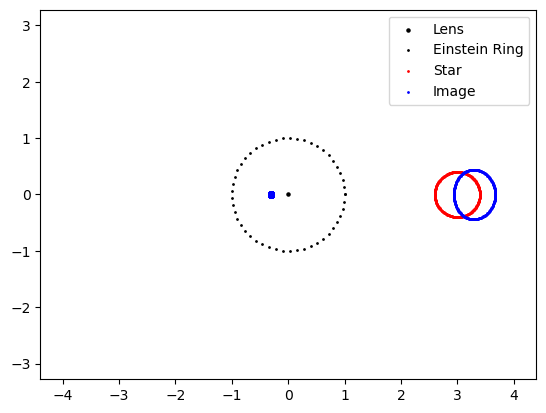

In [3]:
from matplotlib.animation import FFMpegWriter
def animate(i):
    plt.clf()
    R_s = 0.4
    # sx = 1 * np.sin(math.pi * (1/2 + i / 360)) + 4 * (1/2 - i/360)
    sx = 6 * (1/2 - i/720)
    simul = Simul(N=250, R_s=R_s, sx=sx)
    simul.plot()

fig = plt.figure()
ani = animation.FuncAnimation(fig, animate, frames=720)
ani.save('lensing.mp4', writer=animation.FFMpegWriter(fps=120))